# my super first notebook 

In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt

## def des variables 

In [2]:
N = 256 # number of synaptic input 
trials = 1048 # number of trials 
K = 10 # number of classes 
seed = 1973

p_0 = 0.1 #average firing rate
p1 = .01 # average firing probability
B_theta = 0.51 # largeur des probas

fig_width = 10
phi = np.sqrt(5)/2 + 1/2
figsize = (fig_width, fig_width/phi)

verb = True

## generetion de datas

In [12]:
class data : 

    # ... Of Y 
    
    def vm(self, theta_0, B_theta) :
        p = torch.exp(torch.cos(torch.linspace(0, 2*np.pi, N) - theta_0) / B_theta**2)
        p /= p.mean()
        p *= p_0
        return p 
    
    def stack(self):
        p = torch.zeros((N, K))
        for k in range(K) :
            theta_0 = 2 * torch.pi * (k + 1/2) / K
            p[:,k] = self.vm(theta_0 = theta_0, B_theta = B_theta)  
        return p
    
    def plot_proba(self, p, ms='-', alpha=.4):
        fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/phi))
        cmap = plt.get_cmap("plasma")
        if not p is None:
            for k in range(K):
                ax.step(torch.arange(N), p[:, k], ms, alpha=alpha, color=cmap(k/K))
        ax.set_ylabel('probability of firing for each address')
        ax.set_xlabel('input address')
        ax.set_xlim(0, N)
        return fig, ax

    # ... Of X
    def generative_model(self, p, T=None, do_poisson=False) :
        if T is None : 
            if do_poisson:
                # use a Poisson distribution to define variable lengths
                T = trials 
                b = torch.rand((T,N)) < p[None, :]
                b = torch.poisson(b)
                #T = torch.rand(trials)
                #T = torch.poisson(T)
                # doesn't work because torch.rand must be a tuple of ints, not Tensor, d'ailleurs en NP
            else:
                T = trials
                b = torch.rand((T,N)) < p[None, :] # b = datas, b.shape = T,N / number of trials, synaptic inputs / with poisson distrib    
            return b
    
    def get_data(self, p) :
        b = self.generative_model(p.mean() * torch.ones(N))
        order = torch.arange(K)
        #torch.randperm(order)
        for k in order:
            b = torch.vstack((b, self.generative_model(p[:,k]))) # vstack de b T,N avec b probas 
        return b
    
    def plot_raster(self, b, alpha=.4):
        fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width))
        ax.pcolormesh(b.T)
        ax.set_xlabel('time (bin number)')
        ax.set_ylabel('input address')
        return fig, ax


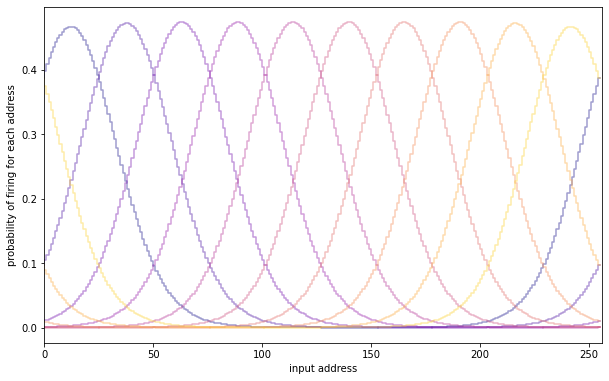

In [13]:
d = data()        
p_true = d.stack() 
d.plot_proba(p_true)

plt.show()

### visu

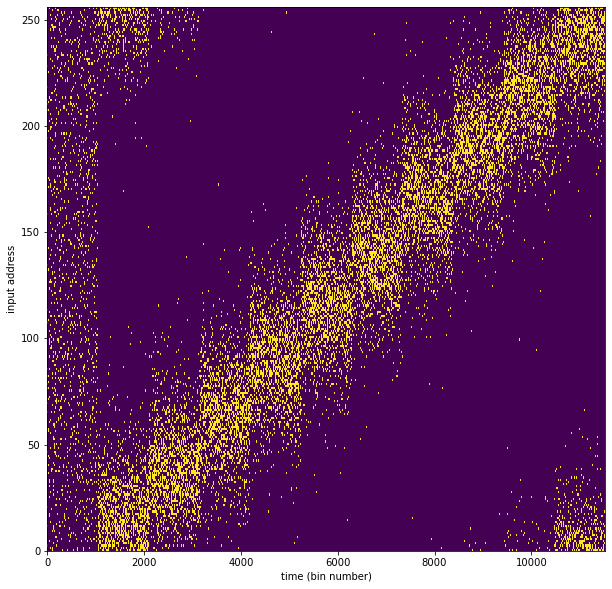

In [14]:
b = d.get_data(p_true)
d.plot_raster(b)
plt.show()

## detection 

## supervised learning 

## unsupervised learning 
